## Lecture Housekeeping:

- The use of disrespectful language is prohibited in the questions, this is a supportive, learning environment for all - please engage accordingly.
    - Please review Code of Conduct (in Student Undertaking Agreement) if unsure
- No question is daft or silly - ask them!
- There are Q&A sessions midway and at the end of the session, should you wish to ask any follow-up questions.
- Should you have any questions after the lecture, please schedule a mentor session.
- For all non-academic questions, please submit a query: [www.hyperiondev.com/support](www.hyperiondev.com/support)

## Principal Component Analysis

#### Learning objectives

   - Introduction to Principal Component Analysis
   - Understand dimensionality of data
   - An overview of how PCA works
   - Examples of PCA visualisations
   - PCA demo

 ## Introduction
 
 - So far the problems we have looked at have had only a handful of input variables. In practice, the number of variables in a machine learning task is usually higher. 

 - As the number of variables grows, the data becomes harder to work with. Relationships between variables become harder to see, training slows down, and the chance of overfitting increases. It is, therefore, useful to know a bit about how to reduce the number of variables while still retaining enough information about our dataset.
 
 - Principal component analysis is a popular technique for analysing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information.
 

## Dimensionality 

We know that data points can be represented as a vector, an array of points in a feature space, e.g [4, 3] for the sepal length and width of an instance in the Iris dataset. A subset of the Iris dataset containing only sepal lengths and widths can be visualised in a 2-dimensional space. One that also included the petal length would be 3-dimensional.

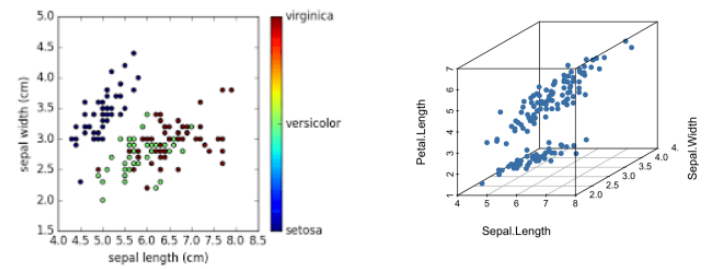


## Dimension Reduction

In many cases, we will find our approach benefits from performing dimensionality reduction. Some reasons why dimensionality reduction is useful include: 

 - Reducing the dimensionality simplifies the dataset, facilitating description and visualisation. 

 - Reducing the dimensionality of the dataset reduces the size of the distance on which clustering algorithms must calculate the dissimilarity between the observations. This may improve their efficiency and positively affect their performance. 

 - Reducing the dimensionality of the dataset reduces the risk of overfitting


## Feature Selection

One way of dealing with multi-dimensional data is to try to remove features which we know have little impact on the outcome variable of our problem. This may involve manually looking at the input variables and deciding which one of them can reasonably be expected to have any impact on the outcome.

If inspection of the variables’ relevance isn’t possible or doesn’t help you narrow down which features to remove, there are also quantitative measures that can inform you of the strength of an input variable’s relationship with an outcome. Scikit-learn has implemented simple methods for applying univariate tests that score input features on their relevance.

### Scree Plot 

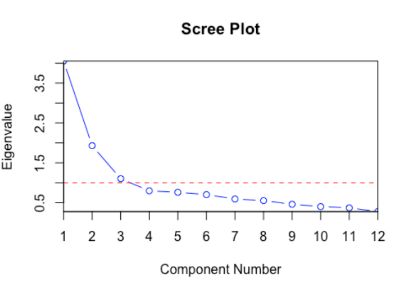


## How PCA works

Using Singular Value Decomposition (svd). From the svd we can obtain the eigenvectors and eigenvalues.

 - The eigenvectors are the directions in which the data is most spread out, and the eigenvalue describes how spread out the data is (how much variance there is) in that direction.
 
 - The eigenvectors obtained from the Singular Value Decomposition (SVD) in Principal Component Analysis (PCA) are linear combinations of the original feature variables.

 - PCA then selects the eigenvectors with the highest eigenvalues and projects the data points into a space that has only those eigenvectors as its dimensions.


## An Overview of Visualisation using PCA

A company wants to assess the performance of their sales team. They have their 50 employees sit for 7 assessments. We are interested in two things:

1. Who is the overall best employee?
2. Putting employees with similar strengths in the same teams.

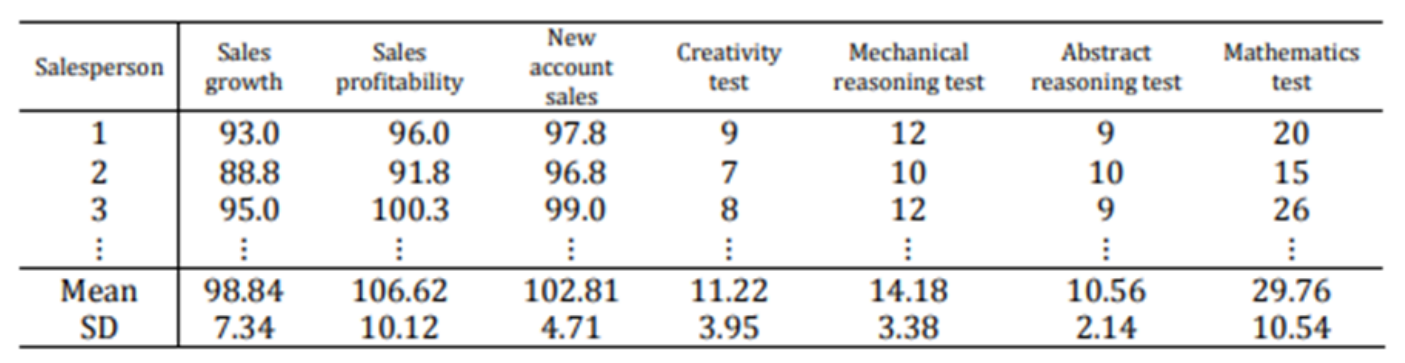

### Ranking 

Question 1 can be answered by ranking PCA scores.

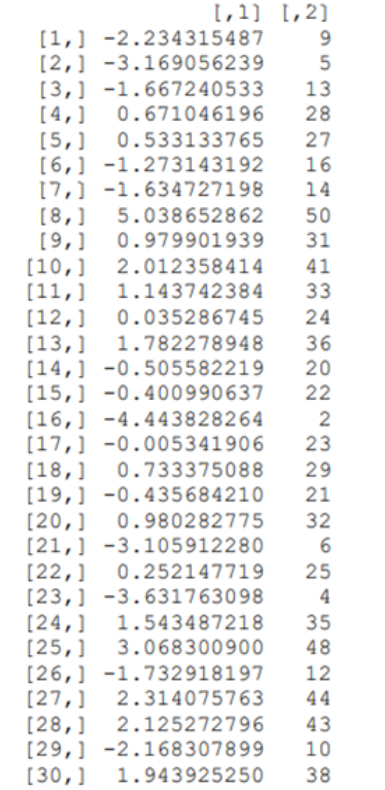
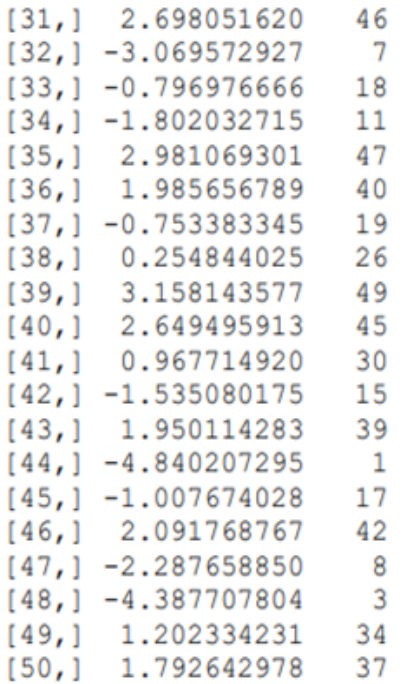


### Biplot

Question 2 can be answered using a biplot.

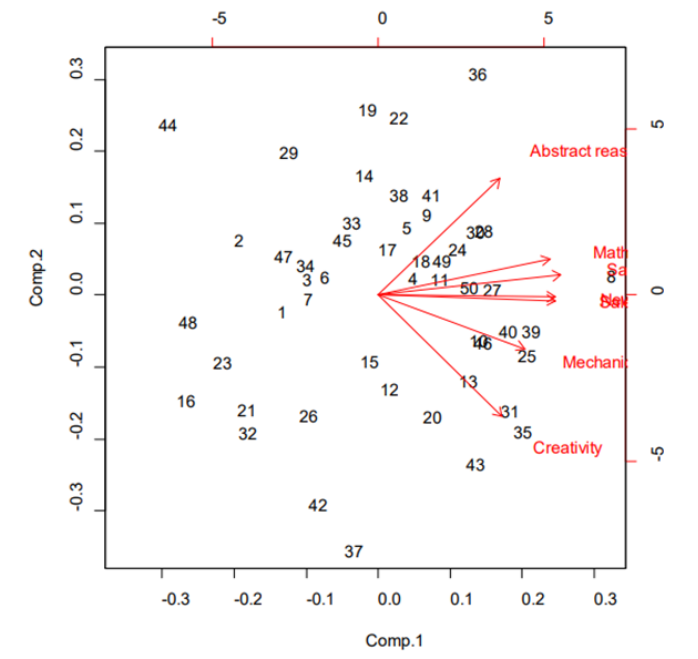

# PCA Demo in Python

The Ames Housing dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa with the goal of predicting the selling price.

For this analysis, we narrowed down the number of features to 24 - we are only considering numeric features. To read the full details about this dataset, you can follow the link:

https://www.kaggle.com/datasets/marcopale/housing

Although 24 is a great reduction from 79, we still want to investigate if working in 24 dimensions is absolutely necessary for us to accurately predict the selling price with integrity. If we can make accurate predictions with fewer dimensions, then we might as well.


In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
data = pd.read_csv("Ames_housing.csv", header = 0)
data = data.fillna(0)
data.head()

,Order,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Age,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Misc Val,SalePrice
0,1,141.0,31770,6,5,1960,63,639.0,0.0,441.0,...,1656,3,7,2,2.0,528.0,210,62,0,215000
1,2,80.0,11622,5,6,1961,62,468.0,144.0,270.0,...,896,2,5,0,1.0,730.0,140,0,0,105000
2,3,81.0,14267,6,6,1958,65,923.0,0.0,406.0,...,1329,3,6,0,1.0,312.0,393,36,12500,172000
3,4,93.0,11160,7,5,1968,55,1065.0,0.0,1045.0,...,2110,3,8,2,2.0,522.0,0,0,0,244000
4,5,74.0,13830,5,5,1997,26,791.0,0.0,137.0,...,1629,3,6,1,2.0,482.0,212,34,0,189900


In [19]:
features = data.drop(columns=["SalePrice"])
features.head()

,Order,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Age,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Misc Val
0,1,141.0,31770,6,5,1960,63,639.0,0.0,441.0,...,0,1656,3,7,2,2.0,528.0,210,62,0
1,2,80.0,11622,5,6,1961,62,468.0,144.0,270.0,...,0,896,2,5,0,1.0,730.0,140,0,0
2,3,81.0,14267,6,6,1958,65,923.0,0.0,406.0,...,0,1329,3,6,0,1.0,312.0,393,36,12500
3,4,93.0,11160,7,5,1968,55,1065.0,0.0,1045.0,...,0,2110,3,8,2,2.0,522.0,0,0,0
4,5,74.0,13830,5,5,1997,26,791.0,0.0,137.0,...,0,1629,3,6,1,2.0,482.0,212,34,0


In [20]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [21]:
pca = PCA()
pca.fit(features_standardized)

PCA()

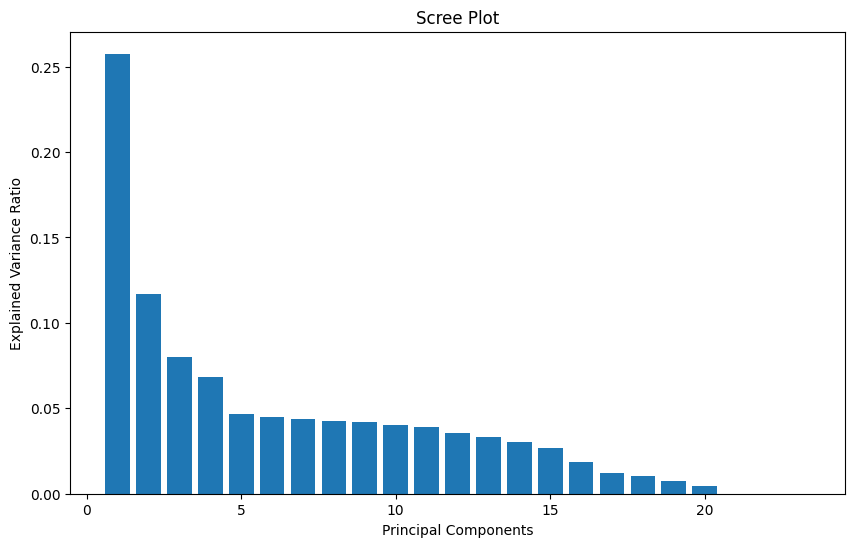

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()


Explore the Ames Housing dataset available at:

https://www.kaggle.com/datasets/marcopale/housing







